Случайный лес — это модель классификации, объединяющая некоторое количество решающих деревьев в одну композицию, за счет чего улучшается их качество работы и обобщающая способность. Деревья строятся независимо друг от друга. Чтобы они отличались друг от друга, обучение проводится не на всей обучающей выборке, а на ее случайном подмножестве. Также, для дальнейшего уменьшения схожести деревьев, оптимальный признак для разбиения выбирается не из всех возможных признаков, а лишь из их случайного подмножества. Прогнозы, выданные деревьями, объединяются в один ответ путем усреднения.

Особенность случайного леса заключается в том, что он не переобучается по мере увеличения количества деревьев в композиции. Это достигается за счет того, что деревья не зависят друг от друга, и поэтому добавление нового дерева в композицию не усложняет модель, а лишь понижает уровень шума в прогнозах.
Реализация в Scikit-Learn

В библиотеке scikit-learn случайные леса реализованы в классах sklearn.ensemble.RandomForestClassifier (для классификации) и sklearn.ensemble.RandomForestRegressor (для регрессии). Обучение модели производится с помощью функции fit, построение прогнозов — с помощью функции predict. Число деревьев задается с помощью поля класса n_estimators. 

Пример использования:

import numpy as np
from sklearn.ensemble import RandomForestRegressor
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([-3, 1, 10])
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X, y)
predictions = clf.predict(X)

Также в этом задании вам понадобится вычислять качество предсказаний на тестовой выборке. Мы будем пользоваться метрикой R2 — по сути, это среднеквадратичная ошибка (MSE), нормированная на отрезок [0, 1] и обращенная так, чтобы ее наилучшим значением была единица. Ее можно вычислить с помощью функции sklearn.metrics.r2_score. Первым аргументов является список правильных ответов на выборке, вторым — список предсказанных ответов. Пример использования:

from sklearn.metrics import r2_score
print r2_score([10, 11, 12], [9, 11, 12.1])

Инструкция по выполнению

В этом задании вам нужно проследить за изменением качества случайного леса в зависимости от количества деревьев в нем.

    Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

    Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. Если вы используете Pandas, то подойдет следующий код: data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

    Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

    Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold.  В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

    Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

    Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/abalone.csv', sep=',')
data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [4]:
data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
data_y = np.array(data.Rings)
data_y

array([15,  7,  9, ...,  9, 10, 12])

In [6]:
data_X = np.array(data.drop(['Rings'], axis = 1))
data_X

array([[ 1.    ,  0.455 ,  0.365 , ...,  0.2245,  0.101 ,  0.15  ],
       [ 1.    ,  0.35  ,  0.265 , ...,  0.0995,  0.0485,  0.07  ],
       [-1.    ,  0.53  ,  0.42  , ...,  0.2565,  0.1415,  0.21  ],
       ...,
       [ 1.    ,  0.6   ,  0.475 , ...,  0.5255,  0.2875,  0.308 ],
       [-1.    ,  0.625 ,  0.485 , ...,  0.531 ,  0.261 ,  0.296 ],
       [ 1.    ,  0.71  ,  0.555 , ...,  0.9455,  0.3765,  0.495 ]])

    Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold.  В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

    Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

    Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_score?

В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [8]:
d1 = []
n_trees = 0
for n in range(1, 50):
    clf = RandomForestRegressor(n_estimators=n, random_state=42)
    clf.fit(data_X, data_y)
    
    sc = cross_val_score(estimator=clf, X=data_X, y=data_y, cv=kf, scoring='r2').mean()
   
    d1.append([n, sc])
    if n_trees == 0 and sc > 0.52:
        n_trees = n

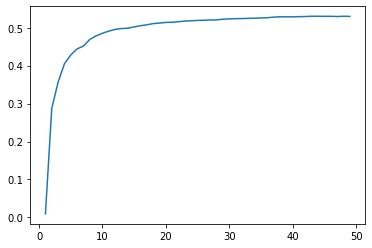

In [9]:
d1 = np.array(d1)
plt.plot(d1[:,0], d1[:,1])

In [10]:
answer = f'{n_trees}'
print(answer)
with open('lab_answ/lab12.txt', 'w') as outfile:
    outfile.write(answer)

27
